<a href="https://colab.research.google.com/github/hargurjeet/Recommedation-Systems/blob/main/Anime_Recommendation_Item_Based_CosineSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# import numpy as np
# import pandas as pd

# # Upload kaggle.jason
# # please follow this link incase not aware: https://www.kaggle.com/general/74235
# from google.colab import files
# files.upload()

# ! pip install opendatasets --upgrade
# import opendatasets as od

# dataset_url = 'https://www.kaggle.com/CooperUnion/anime-recommendations-database'
# od.download(dataset_url)

In [36]:
anime_data=pd.read_csv("/content/anime-recommendations-database/anime.csv")
rating_data=pd.read_csv("/content/anime-recommendations-database/rating.csv")

In [37]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [38]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Before I join let us rename few column to avoid confusion also improving the formatting

In [39]:
anime_data = anime_data.rename(columns={'rating': 'Average_Rating', 'name':'Name', 'genre':'Genre', 'type': 'Type', 'episodes': 'Episodes', 
                                        'members':'Members'})
anime_data.head()

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [40]:
rating_data = rating_data.rename(columns={'rating': 'Actual_Rating', 'user_id':'User_id'})
rating_data.head()

,User_id,anime_id,Actual_Rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [41]:
full_data=anime_data.merge(rating_data,how='left', on='anime_id')
full_data.shape
full_data.head()

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,User_id,Actual_Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0


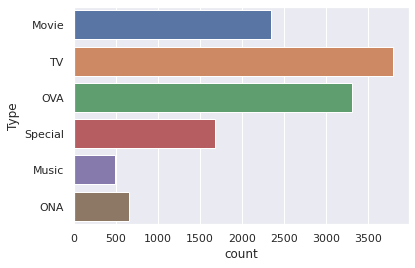

In [42]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(y="Type", data=anime_data)

Maz reviews against anime

In [43]:
Top_10_Anime = full_data.groupby('Name')['User_id'].count().sort_values(ascending=False).head(10).reset_index()
Top_10_Anime

,Name,User_id
0,Death Note,39340
1,Sword Art Online,30583
2,Shingeki no Kyojin,29584
3,Code Geass: Hangyaku no Lelouch,27718
4,Elfen Lied,27506
5,Angel Beats!,27183
6,Naruto,25925
7,Fullmetal Alchemist,25032
8,Fullmetal Alchemist: Brotherhood,24574
9,Toradora!,24283


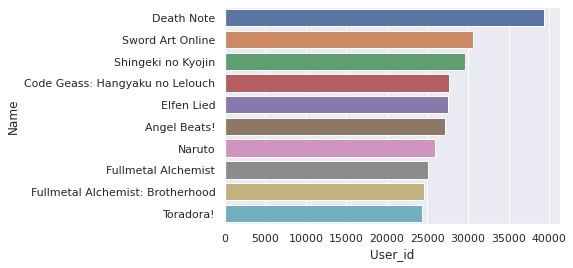

In [44]:
sns.barplot(y='Name', x="User_id", data=Top_10_Anime)

In [45]:
rating_data.head()

,User_id,anime_id,Actual_Rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [48]:
rating_data_with_Anime_name = rating_data.merge(anime_data[['Name', 'anime_id']], on='anime_id', how='left')
rating_data_with_Anime_name.head(10)

,User_id,anime_id,Actual_Rating,Name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
5,1,355,-1,Shakugan no Shana
6,1,356,-1,Fate/stay night
7,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...
8,1,487,-1,Girls Bravo: Second Season
9,1,846,-1,School Rumble Ni Gakki


In [54]:
ratings = rating_data_with_Anime_name.groupby('Name')['Actual_Rating'].mean().reset_index()
ratings.rename(columns={'Actual_Rating': 'Avg_Rating'}, inplace=True)
ratings.head()

,Name,Avg_Rating
0,&quot;0&quot;,2.769231
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,5.774936
3,&quot;Bungaku Shoujo&quot; Memoire,6.155748
4,&quot;Bungaku Shoujo&quot; Movie,6.457980
...,...,...
11191,xxxHOLiC Kei,6.720774
11192,xxxHOLiC Movie: Manatsu no Yoru no Yume,6.313742
11193,xxxHOLiC Rou,6.403173
11194,xxxHOLiC Shunmuki,6.238602


In [71]:
ratings_count = rating_data_with_Anime_name.groupby(['Name'])['Actual_Rating'].count().reset_index()
ratings_count.rename(columns={'Actual_Rating':'number_of_ratings'}, inplace=True)

ratings_count.head()

,Name,number_of_ratings
0,&quot;0&quot;,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,782
3,&quot;Bungaku Shoujo&quot; Memoire,809
4,&quot;Bungaku Shoujo&quot; Movie,1535


In [76]:
ratings['number_of_ratings']= ratings_count.number_of_ratings
ratings

,Name,Actual_Rating,number_of_ratings
0,&quot;0&quot;,2.769231,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,5.774936,782
3,&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
4,&quot;Bungaku Shoujo&quot; Movie,6.457980,1535
...,...,...,...
11191,xxxHOLiC Kei,6.720774,3413
11192,xxxHOLiC Movie: Manatsu no Yoru no Yume,6.313742,2365
11193,xxxHOLiC Rou,6.403173,1513
11194,xxxHOLiC Shunmuki,6.238602,1974
